[*********************100%%**********************]  1 of 1 completed


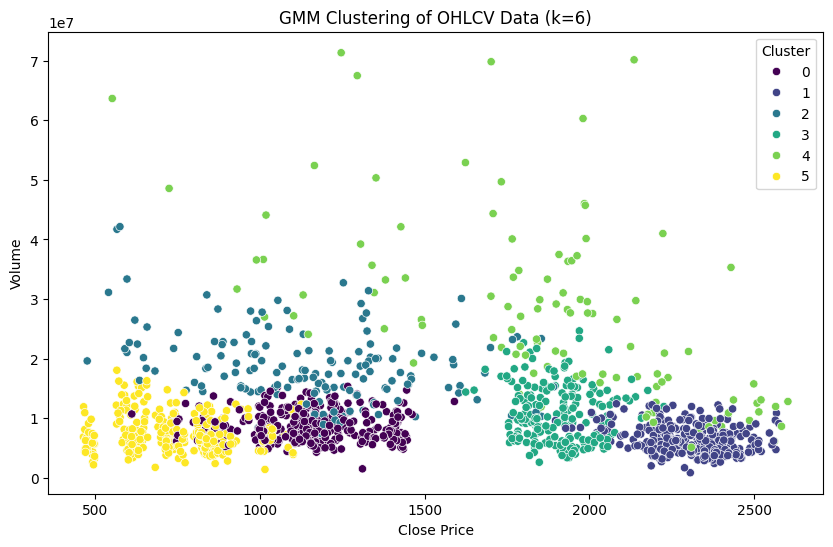

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download OHLCV data from Yahoo Finance
ticker = 'RELIANCE.NS'  # You can change this to any other ticker
start_date = '2017-01-01'
end_date = '2022-12-31'
df = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocess the data
# We'll only keep the OHLCV columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply GMM Clustering
# Decide the number of clusters, for example, 3
num_clusters = 6
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
df['Cluster'] = gmm.fit_predict(scaled_data)

# Step 4: Visualize the Clusters
# For simplicity, we'll visualize clusters based on 'Close' and 'Volume'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Close'], y=df['Volume'], hue=df['Cluster'], palette='viridis')
plt.title(f'GMM Clustering of OHLCV Data (k={num_clusters})')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()
